In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf1106.dat',names=True)

In [3]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [4]:
mat_match = np.genfromtxt('pixPosHorIhannah_idmattia.dat',names=True)

In [5]:
matched = np.genfromtxt('catRawMags1305/catDir/matchedMattiaInfo.dat',names=True)

In [6]:
match_g = matched[matched['m606c']>10]

In [7]:
file_g = file[file['magPSF']>10]
file_g = file_g[file_g['c_star']>0.5]

In [8]:
magDiff = file_g['magZPT'] - file_g['magPSF']

In [9]:
print('Median:',np.median(magDiff))
print('Mean:',np.mean(magDiff))
print('St. Dev:',np.std(magDiff))
print('Num. of Sources:',len(magDiff))

Median: 0.013172000777000648
Mean: -0.037427453975603917
St. Dev: 0.34322859647813353
Num. of Sources: 1024


In [23]:
magOrig = match_g['mag1'] - match_g['m606c']
print('Median:',np.median(magOrig))
print('Mean:',np.mean(magOrig))
print('St. Dev:',np.std(magOrig))
print('Num. of Sources:',len(magOrig))

Median: 0.6515999999999984
Mean: 0.5316653351387949
St. Dev: 0.4794614042922853
Num. of Sources: 1477


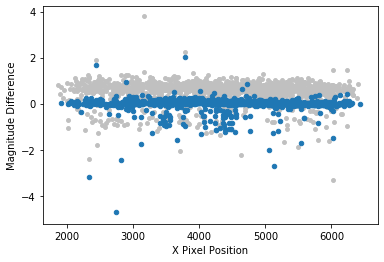

In [24]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

plt.show()

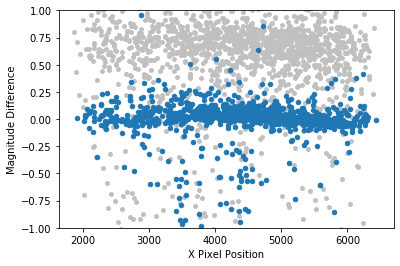

In [25]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

ax.set_ylim(-1,1)
plt.show()

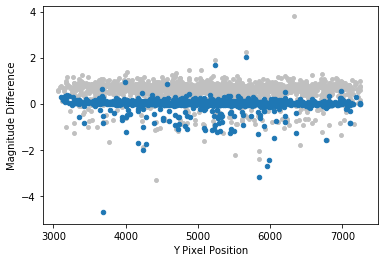

In [26]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

plt.show()

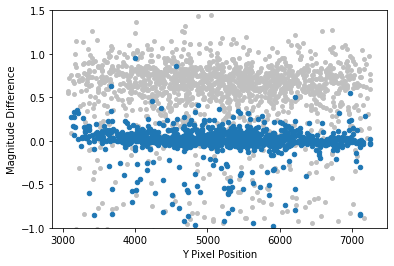

In [36]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

ax.set_ylim(-1,1.5)
plt.show()

In [28]:
len(match_g)

1477

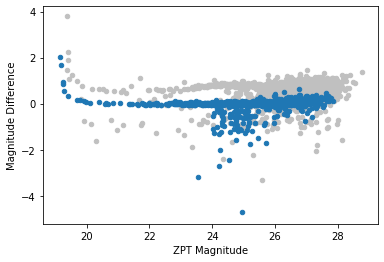

In [29]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

plt.show()

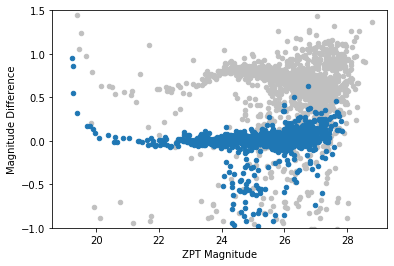

In [37]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

ax.set_ylim(-1,1.5)
plt.show()

In [46]:
keep = file_g['mag1']!=file_g['mag1']
tmp_keep = np.logical_and(magDiff>=-0.1,magDiff<=0.1)
keep = np.logical_or(keep,tmp_keep)

In [48]:
max(magDiff[keep])

0.2878678341103331

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# data = np.arange(100, 0, -1).reshape(10, 10)

# fig, ax = plt.subplots()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)

# im = ax.imshow(data, cmap='bone')

# fig.colorbar(im, cax=cax, orientation='vertical')
# plt.show()

In [53]:
import matplotlib as mpl

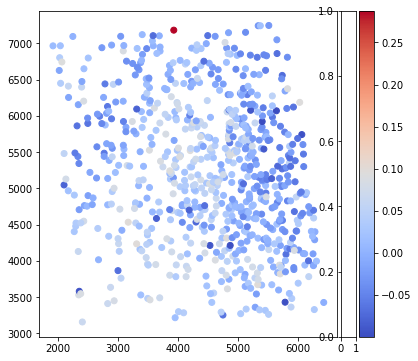

In [61]:
fig, ax = plt.subplots(figsize=(6,6))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cax = divider.append_axes('right', size='5%', pad=0.05)



# cmap = mpl.cm.cool
# cbar = mpl.colorbar.ColorbarBase(ax, cmap=cmap,\
#                 norm=mpl.colors.Normalize(vmin=-0.1, vmax=0.1))
# cbar.set_clim(-0.3, 0.3)
im = ax.scatter(file_g['xPSF_trans'][keep],file_g['yPSF_trans'][keep], 
                c=magDiff[keep],cmap='coolwarm')
fig.colorbar(im, cax=cax, orientation='vertical')

# ax.scatter(file_g['xPSF_trans'][keep],file_g['yPSF_trans'][keep],c=magDiff[keep],s=20)



plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
# .reshape((-1, 1))

In [38]:
model = LinearRegression().fit(file_g['yPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.018745788632609124
slope: [-1.08517936e-05]


In [39]:
model = LinearRegression().fit(file_g['xPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.05971595576216084
slope: [5.05302236e-06]
